In [1]:
import pandas as pd
import numpy as mp
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, auc
import statsmodels.api as sm
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
pwd

'/Users/yuanqi/Desktop/DSA4262-ACMXZ/modelling'

In [ ]:
ROC: 0.7
PR AUC: 0.3

In [2]:
## Load in Test Set
#X_test_path = "../data/preprocessed_data/test/X_test_enc.parquet"
X_test_path = "../data/new_preprocessed_data/test/X_test_enc.parquet"
X_test = pd.read_parquet(X_test_path)

y_test_path = "../data/new_preprocessed_data/test/y_test.parquet"
y_test = pd.read_parquet(y_test_path)
y_test = pd.DataFrame(y_test['label'].astype(int)) ## convert labels to int for roc and auc calculation

## Load in Validation Set
X_val_path = "../data/new_preprocessed_data/validation/X_val_enc.parquet"
X_val = pd.read_parquet(X_val_path)

y_val_path = "../data/new_preprocessed_data/validation/y_val.parquet"
y_val = pd.read_parquet(y_val_path)
y_val = pd.DataFrame(y_val['label'].astype(int))

In [44]:
def xgbmodel(x_train, y_train, x_val, y_val, x_test, y_test, variable):
    
    ## fit logistic regression on training data
    model = xgb.XGBClassifier()
    model.fit(x_train, y_train)

    ## predicting validation set result and calculating accuracy
    y_val_pred = model.predict(x_val)
    print('Accuracy of logistic regression classifier on validation set using {}: {:.2f}'.format(variable, model.score(x_val, y_val)))

    ## predicting test set result and calculating accuracy
    y_test_pred = model.predict(x_test)
    print('Accuracy of logistic regression classifier on test set using {}: {:.2f}'.format(variable, model.score(x_test, y_test)))

    ## define metrics for roc
    y_test_pred_proba = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    mlp_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    # fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba, pos_label=1)
    print('auc: ', auc(fpr, tpr))   
    # calculate the precision-recall auc
    precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
    auc_score = auc(recall, precision)
    print('PR AUC: %.3f' % auc_score)
    
    ## create roc curve   
    plt.figure()
    plt.plot(fpr, tpr, label = 'XGBoost (area = %0.2f)' % mlp_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()


    # plot
    plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
    plt.show()


    # plot feature importance
    plot_importance(model)
    plt.show()

In [3]:
## function for basic classification
def xgbmodel(x_train, y_train, x_val, y_val, x_test, y_test, variable):
    
    model = xgb.XGBClassifier()
    model.fit(x_train, y_train)

    ## get validation and test predicition
    y_val_pred = model.predict(x_val)
    print('Accuracy of random forest classifier on validation set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_val, y_val_pred)))
   
    y_test_pred = model.predict(x_test)
    print('Accuracy of random forest classifier on test set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_test, y_test_pred)))

    ## define metrics for roc
    y_test_pred_proba = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    rf_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    
    ## create roc curve   
    plt.figure()
    plt.plot(fpr, tpr, label = 'Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()

    ## define metric for precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
    auc_precision_recall = auc(recall, precision)

    ## create pr curve   
    plt.figure()
    plt.plot(recall, precision, label = 'Random Forest Classifier (area = %0.2f)' % auc_precision_recall)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall')
    plt.legend(loc = "lower right")
    plt.show()

In [23]:
X_val.columns

Index(['reads_count', 'dwelling_time_-1_25', 'dwelling_time_-1_50',
       'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'std_-1_25',
       'std_-1_50', 'std_-1_75', 'std_-1_mean', 'mean_-1_25', 'mean_-1_50',
       'mean_-1_75', 'mean_-1_mean', 'dwelling_time_0_25',
       'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean',
       'std_0_25', 'std_0_50', 'std_0_75', 'std_0_mean', 'mean_0_25',
       'mean_0_50', 'mean_0_75', 'mean_0_mean', 'dwelling_time_+1_25',
       'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean',
       'std_+1_25', 'std_+1_50', 'std_+1_75', 'std_+1_mean', 'mean_+1_25',
       'mean_+1_50', 'mean_+1_75', 'mean_+1_mean', 'position_0_A',
       'position_0_C', 'position_0_G', 'position_0_T', 'position_1_A',
       'position_1_C', 'position_1_G', 'position_1_T', 'position_2_A',
       'position_2_C', 'position_2_G', 'position_2_T', 'position_3_A',
       'position_3_C', 'position_3_G', 'position_3_T', 'position_4_A',
       'p

In [4]:
## need to drop columns for X validation and test data

X_val_25 = X_val.drop(['dwelling_time_-1_50','dwelling_time_-1_75', 'dwelling_time_-1_mean', 
        'std_-1_50', 'std_-1_75', 'std_-1_mean', 
        'mean_-1_50','mean_-1_75', 'mean_-1_mean',
        'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean',
       'std_0_50', 'std_0_75', 'std_0_mean',
       'mean_0_50', 'mean_0_75', 'mean_0_mean',
       'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean',
       'std_+1_50', 'std_+1_75', 'std_+1_mean',
       'mean_+1_50', 'mean_+1_75', 'mean_+1_mean'], axis = 1)
# X_train_25 = X_train_enc.drop(columns=['dwelling_time_-1_50', 'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'std_-1_50', 'std_-1_75', 'std_-1_mean', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean',
#                                         'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean', 'std_0_50', 'std_0_75', 'std_0_mean', 'mean_0_50', 'mean_0_75', 'mean_0_mean',
#                                         'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean', 'std_+1_50', 'std_+1_75', 'std_+1_mean', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean'])

# X_val_50 = X_val.drop(['dwelling_time_25', 'dwelling_time_75', 'dwelling_time_mean', 'std_25', 'std_75', 'std_mean', 'mean_25', 'mean_75', 'mean_mean'], axis = 1)
# X_val_75 = X_val.drop(['dwelling_time_25', 'dwelling_time_50', 'dwelling_time_mean', 'std_25', 'std_50', 'std_mean', 'mean_25', 'mean_50', 'mean_mean'], axis = 1)
# X_val_mean = X_val.drop(['dwelling_time_25', 'dwelling_time_50', 'dwelling_time_75', 'std_25', 'std_50', 'std_75', 'mean_25', 'mean_50', 'mean_75'], axis = 1)

X_test_25 = X_test.drop(['dwelling_time_-1_50','dwelling_time_-1_75', 'dwelling_time_-1_mean', 
        'std_-1_50', 'std_-1_75', 'std_-1_mean', 
        'mean_-1_50','mean_-1_75', 'mean_-1_mean',
        'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean',
       'std_0_50', 'std_0_75', 'std_0_mean',
       'mean_0_50', 'mean_0_75', 'mean_0_mean',
       'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean',
       'std_+1_50', 'std_+1_75', 'std_+1_mean',
       'mean_+1_50', 'mean_+1_75', 'mean_+1_mean'], axis = 1)
# X_test_50 = X_test.drop(['dwelling_time_25', 'dwelling_time_75', 'dwelling_time_mean', 'std_25', 'std_75', 'std_mean', 'mean_25', 'mean_75', 'mean_mean'], axis = 1)
# X_test_75 = X_test.drop(['dwelling_time_25', 'dwelling_time_50', 'dwelling_time_mean', 'std_25', 'std_50', 'std_mean', 'mean_25', 'mean_50', 'mean_mean'], axis = 1)
# X_test_mean = X_test.drop(['dwelling_time_25', 'dwelling_time_50', 'dwelling_time_75', 'std_25', 'std_50', 'std_75', 'mean_25', 'mean_50', 'mean_75'], axis = 1)

In [5]:
## Load Datasets
X_train_25_path = "../data/new_preprocessed_data/training/X_train_25.parquet" ## to edit file path
X_train_25 = pd.read_parquet(X_train_25_path)

y_train_path = "../data/new_preprocessed_data/training/y_train.parquet"
y_train = pd.read_parquet(y_train_path)
y_train = pd.DataFrame(y_train['label'].astype(int))

In [6]:
## check if training data are the same len
print(f"Number of Rows for X_train_25 and y_train: {len(X_train_25)}, {len(y_train)}")

## check if validation data are the same len
print(f"Number of Rows for X_val_25 and y_val: {len(X_val_25)}, {len(y_val)}")

## check if test data are the same len
print(f"Number of Rows for X_test_25 and y_test: {len(X_test_25)}, {len(y_test)}")

Number of Rows for X_train_25 and y_train: 30406, 30406
Number of Rows for X_val_25 and y_val: 12143, 12143
Number of Rows for X_test_25 and y_test: 11825, 11825


In [7]:
X_val_25.columns

Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')

In [8]:
X_train_25.columns

Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')

In [ ]:
X_train_25 = X_train_enc.drop(columns=['dwelling_time_-1_50', 'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'std_-1_50', 'std_-1_75', 'std_-1_mean', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean',
                                        'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean', 'std_0_50', 'std_0_75', 'std_0_mean', 'mean_0_50', 'mean_0_75', 'mean_0_mean',
                                        'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean', 'std_+1_50', 'std_+1_75', 'std_+1_mean', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean'])

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:30:10] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of random forest classifier on validation set using 25th quantile: 0.95
Accuracy of random forest classifier on test set using 25th quantile: 0.95


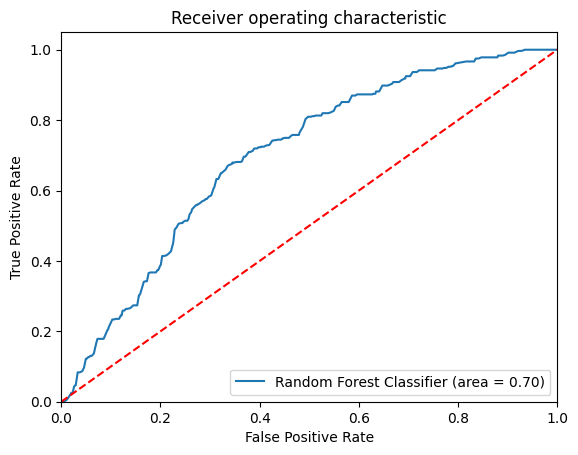

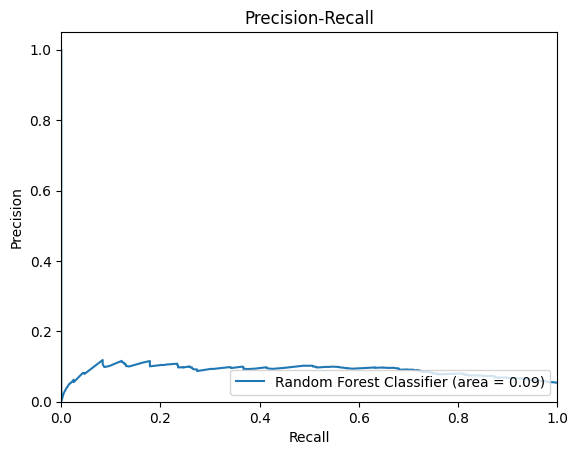

In [9]:
xgbmodel(X_train_25, y_train.values.ravel(), X_val_25, y_val.values.ravel(), X_test_25, y_test.values.ravel(), "25th quantile")

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:30:34] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of random forest classifier on validation set using 25th quantile: 0.95
Accuracy of random forest classifier on test set using 25th quantile: 0.95


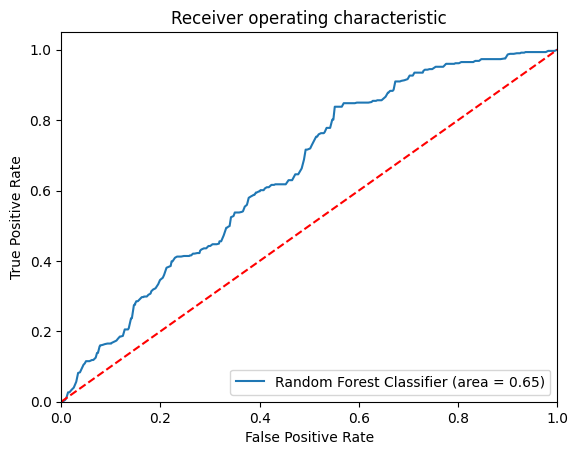

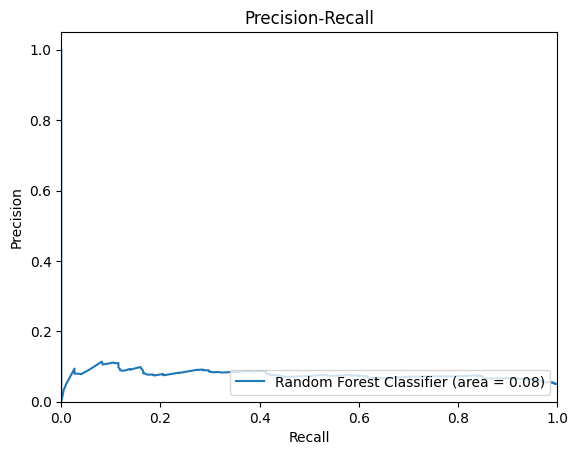

In [12]:
xgbmodel(X_train_25_new, y_train.values.ravel(), X_val_25_new, y_val.values.ravel(), X_test_25_new, y_test.values.ravel(), "25th quantile")

In [11]:
features = ['reads_count', 'std_-1_25', 'mean_-1_25', 'dwelling_time_0_25',
       'std_0_25', 'mean_0_25', 'dwelling_time_+1_25', 'std_+1_25',
       'mean_+1_25', 'position_0_A', 'position_0_C', 'position_0_G',
       'position_0_T', 'position_1_A', 'position_1_G', 'position_1_T',
       'position_2_A', 'position_5_A', 'position_5_C', 'position_5_T',
       'position_6_A', 'position_6_C', 'position_6_G', 'position_6_T']
X_train_25_new = X_train_25[features]
X_test_25_new = X_test_25[features]
X_val_25_new = X_val_25[features]

In [66]:
X_train_25_new

,reads_count,std_-1_25,mean_-1_25,dwelling_time_0_25,std_0_25,mean_0_25,dwelling_time_+1_25,std_+1_25,mean_+1_25,position_0_A,...,position_1_G,position_1_T,position_2_A,position_5_A,position_5_C,position_5_T,position_6_A,position_6_C,position_6_G,position_6_T
0,0.100207,0.520839,0.670027,0.338710,0.406162,0.659660,0.282460,0.159468,0.694184,1,...,1,0,0,0,0,1,1,0,0,0
1,0.351240,0.519989,0.853346,0.167869,0.169468,0.121121,0.484217,0.106010,0.574109,1,...,1,0,1,1,0,0,0,0,1,0
2,0.045455,0.108874,0.468378,0.150467,0.142577,0.339339,0.650179,0.151314,0.812383,0,...,0,0,1,0,0,1,1,0,0,0
3,0.143595,0.521973,0.871677,0.134975,0.203361,0.261261,0.346892,0.105708,0.763602,1,...,1,0,1,0,0,1,0,0,0,1
4,0.007231,0.080805,0.385885,0.197793,0.140616,0.195195,0.444517,0.152824,0.538462,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51562,0.076446,0.694739,0.667469,0.140917,0.125454,0.172940,0.219426,0.107642,0.567993,0,...,1,0,1,0,0,1,0,1,0,0
51563,0.027893,0.151027,0.688359,0.198628,0.393699,0.680232,0.304474,0.166279,0.653749,0,...,1,0,0,0,0,1,0,1,0,0
51564,0.263430,0.245713,0.431321,0.117942,0.424829,0.631288,0.273610,0.141926,0.482845,0,...,0,1,0,1,0,0,0,1,0,0
51565,0.104339,0.526291,0.869009,0.180325,0.187888,0.246069,0.229932,0.093805,0.799897,1,...,1,0,1,0,0,1,0,0,0,1


In [13]:
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# fit model on all training data
model = XGBClassifier()
model.fit(X_train_25, y_train.values.ravel())
# make predictions for test data and evaluate
y_pred = model.predict(X_test_25)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train_25)

	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train.values.ravel())
	print(X_train_25.columns[selection.get_support()]) 

	# eval model
	select_X_test = selection.transform(X_test_25)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:30:50] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 94.93%
[17:30:53] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.000, n=38, Accuracy: 94.93%
[17:30:55] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.000, n=38, Accuracy: 94.93%
[17:30:58] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.000, n=38, Accuracy: 94.93%
[17:31:01] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.000, n=38, Accuracy: 94.93%
[17:31:04] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.000, n=38, Accuracy: 94.93%
[17:31:07] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.000, n=38, Accuracy: 94.93%
[17:31:10] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.000, n=38, Accuracy: 94.93%
[17:31:13] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.000, n=38, Accuracy: 94.93%
[17:31:16] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.000, n=38, Accuracy: 94.93%
[17:31:19] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.000, n=38, Accuracy: 94.93%
[17:31:21] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.000, n=38, Accuracy: 94.93%
[17:31:25] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.000, n=38, Accuracy: 94.93%
[17:31:28] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_C',
       'position_1_G', 'position_1_T', 'position_2_A', 'position_2_C',
       'position_2_G', 'position_2_T', 'position_3_A', 'position_3_C',
       'position_3_G', 'position_3_T', 'position_4_A', 'position_4_C',
       'position_4_G', 'position_4_T', 'position_5_A', 'position_5_C',
       'position_5_G', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.000, n=38, Accuracy: 94.93%
[17:31:33] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_G',
       'position_1_T', 'position_2_A', 'position_5_A', 'position_5_C',
       'position_5_T', 'position_6_A', 'position_6_C', 'position_6_G',
       'position_6_T'],
      dtype='object')
Thresh=0.005, n=25, Accuracy: 94.93%
[17:31:40] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'dwelling_time_-1_25', 'std_-1_25', 'mean_-1_25',
       'dwelling_time_0_25', 'std_0_25', 'mean_0_25', 'dwelling_time_+1_25',
       'std_+1_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_G',
       'position_2_A', 'position_5_A', 'position_5_C', 'position_5_T',
       'position_6_A', 'position_6_C', 'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.007, n=24, Accuracy: 94.93%
[17:31:45] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'std_-1_25', 'mean_-1_25', 'dwelling_time_0_25',
       'std_0_25', 'mean_0_25', 'dwelling_time_+1_25', 'std_+1_25',
       'mean_+1_25', 'position_0_A', 'position_0_C', 'position_0_G',
       'position_0_T', 'position_1_A', 'position_1_G', 'position_2_A',
       'position_5_A', 'position_5_C', 'position_5_T', 'position_6_A',
       'position_6_C', 'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.007, n=23, Accuracy: 94.93%
[17:31:48] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'std_-1_25', 'mean_-1_25', 'dwelling_time_0_25',
       'std_0_25', 'mean_0_25', 'std_+1_25', 'mean_+1_25', 'position_0_A',
       'position_0_C', 'position_0_G', 'position_0_T', 'position_1_A',
       'position_1_G', 'position_2_A', 'position_5_A', 'position_5_C',
       'position_5_T', 'position_6_A', 'position_6_C', 'position_6_G',
       'position_6_T'],
      dtype='object')
Thresh=0.007, n=22, Accuracy: 94.93%
[17:31:50] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['reads_count', 'std_-1_25', 'mean_-1_25', 'dwelling_time_0_25',
       'std_0_25', 'mean_0_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_G',
       'position_2_A', 'position_5_A', 'position_5_C', 'position_5_T',
       'position_6_A', 'position_6_C', 'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.008, n=21, Accuracy: 94.93%
[17:31:52] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['std_-1_25', 'mean_-1_25', 'dwelling_time_0_25', 'std_0_25',
       'mean_0_25', 'mean_+1_25', 'position_0_A', 'position_0_C',
       'position_0_G', 'position_0_T', 'position_1_A', 'position_1_G',
       'position_2_A', 'position_5_A', 'position_5_C', 'position_5_T',
       'position_6_A', 'position_6_C', 'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.008, n=20, Accuracy: 94.93%
[17:31:54] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['std_-1_25', 'mean_-1_25', 'std_0_25', 'mean_0_25', 'mean_+1_25',
       'position_0_A', 'position_0_C', 'position_0_G', 'position_0_T',
       'position_1_A', 'position_1_G', 'position_2_A', 'position_5_A',
       'position_5_C', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.009, n=19, Accuracy: 94.93%
[17:31:56] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['std_-1_25', 'mean_-1_25', 'std_0_25', 'mean_0_25', 'mean_+1_25',
       'position_0_A', 'position_0_C', 'position_0_T', 'position_1_A',
       'position_1_G', 'position_2_A', 'position_5_A', 'position_5_C',
       'position_5_T', 'position_6_A', 'position_6_C', 'position_6_G',
       'position_6_T'],
      dtype='object')
Thresh=0.009, n=18, Accuracy: 94.93%
[17:31:58] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['std_-1_25', 'mean_-1_25', 'std_0_25', 'mean_0_25', 'mean_+1_25',
       'position_0_A', 'position_0_T', 'position_1_A', 'position_1_G',
       'position_2_A', 'position_5_A', 'position_5_C', 'position_5_T',
       'position_6_A', 'position_6_C', 'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.009, n=17, Accuracy: 94.93%
[17:32:00] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['std_-1_25', 'mean_-1_25', 'std_0_25', 'mean_0_25', 'mean_+1_25',
       'position_0_A', 'position_0_T', 'position_1_A', 'position_1_G',
       'position_2_A', 'position_5_C', 'position_5_T', 'position_6_A',
       'position_6_C', 'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.010, n=16, Accuracy: 94.93%
[17:32:02] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['std_-1_25', 'mean_-1_25', 'std_0_25', 'mean_0_25', 'mean_+1_25',
       'position_0_A', 'position_0_T', 'position_1_A', 'position_1_G',
       'position_2_A', 'position_5_T', 'position_6_A', 'position_6_C',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.012, n=15, Accuracy: 94.93%
[17:32:04] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['std_-1_25', 'mean_-1_25', 'std_0_25', 'mean_0_25', 'mean_+1_25',
       'position_0_T', 'position_1_A', 'position_1_G', 'position_2_A',
       'position_5_T', 'position_6_A', 'position_6_C', 'position_6_G',
       'position_6_T'],
      dtype='object')
Thresh=0.013, n=14, Accuracy: 94.93%
[17:32:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['std_-1_25', 'mean_-1_25', 'std_0_25', 'mean_0_25', 'mean_+1_25',
       'position_0_T', 'position_1_A', 'position_1_G', 'position_2_A',
       'position_5_T', 'position_6_A', 'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.013, n=13, Accuracy: 94.93%
[17:32:08] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['mean_-1_25', 'std_0_25', 'mean_0_25', 'mean_+1_25', 'position_0_T',
       'position_1_A', 'position_1_G', 'position_2_A', 'position_5_T',
       'position_6_A', 'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.014, n=12, Accuracy: 94.93%
[17:32:10] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['std_0_25', 'mean_0_25', 'mean_+1_25', 'position_0_T', 'position_1_A',
       'position_1_G', 'position_2_A', 'position_5_T', 'position_6_A',
       'position_6_G', 'position_6_T'],
      dtype='object')
Thresh=0.014, n=11, Accuracy: 94.93%
[17:32:12] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['std_0_25', 'mean_0_25', 'mean_+1_25', 'position_1_A', 'position_1_G',
       'position_2_A', 'position_5_T', 'position_6_A', 'position_6_G',
       'position_6_T'],
      dtype='object')
Thresh=0.015, n=10, Accuracy: 94.93%
[17:32:13] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['std_0_25', 'mean_0_25', 'mean_+1_25', 'position_1_A', 'position_1_G',
       'position_2_A', 'position_5_T', 'position_6_A', 'position_6_G'],
      dtype='object')
Thresh=0.018, n=9, Accuracy: 94.93%
[17:32:15] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['std_0_25', 'mean_0_25', 'mean_+1_25', 'position_1_G', 'position_2_A',
       'position_5_T', 'position_6_A', 'position_6_G'],
      dtype='object')
Thresh=0.021, n=8, Accuracy: 94.93%
[17:32:16] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['mean_0_25', 'mean_+1_25', 'position_1_G', 'position_2_A',
       'position_5_T', 'position_6_A', 'position_6_G'],
      dtype='object')
Thresh=0.022, n=7, Accuracy: 94.93%
[17:32:17] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['mean_0_25', 'position_1_G', 'position_2_A', 'position_5_T',
       'position_6_A', 'position_6_G'],
      dtype='object')
Thresh=0.025, n=6, Accuracy: 94.93%
[17:32:18] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['mean_0_25', 'position_1_G', 'position_2_A', 'position_5_T',
       'position_6_G'],
      dtype='object')
Thresh=0.026, n=5, Accuracy: 94.93%
[17:32:19] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['position_1_G', 'position_2_A', 'position_5_T', 'position_6_G'], dtype='object')
Thresh=0.032, n=4, Accuracy: 92.42%
[17:32:19] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['position_1_G', 'position_2_A', 'position_5_T'], dtype='object')
Thresh=0.039, n=3, Accuracy: 92.42%
[17:32:20] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['position_1_G', 'position_5_T'], dtype='object')
Thresh=0.251, n=2, Accuracy: 94.93%
[17:32:20] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['position_1_G'], dtype='object')
Thresh=0.408, n=1, Accuracy: 94.93%


/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
#Thresh=0.008, n=24, Accuracy: 93.62%
model = SelectFromModel(lsvc, prefit=True) 
X_new = model.transform(X) 
print(X.columns[model.get_support()]) 

In [20]:
## Load Datasets
X_train_50_path = "../data/new_preprocessed_data/training/X_train_50.parquet" ## to edit file path
X_train_50 = pd.read_parquet(X_train_50_path)

In [21]:
## check if training data are the same len
print(f"Number of Rows for X_train_50 and y_train: {len(X_train_50)}, {len(y_train)}")

## check if validation data are the same len
print(f"Number of Rows for X_val_50 and y_val: {len(X_val_50)}, {len(y_val)}")

## check if test data are the same len
print(f"Number of Rows for X_test_50 and y_test: {len(X_test_50)}, {len(y_test)}")

Number of Rows for X_train_50 and y_train: 51567, 51567
Number of Rows for X_val_50 and y_val: 17434, 17434
Number of Rows for X_test_50 and y_test: 16275, 16275


In [13]:
xgboost(X_train_50, y_train, X_val_50, y_val, X_test_50, y_test, "50th quantile")

NameError: name 'X_train_50' is not defined

In [23]:
## Load Datasets
X_train_75_path = "../data/preprocessed_data/training/X_train_75.parquet" ## to edit file path
X_train_75 = pd.read_parquet(X_train_75_path)

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[20:57:50] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of logistic regression classifier on validation set using 50th quantile: 0.93
Accuracy of logistic regression classifier on test set using 50th quantile: 0.94


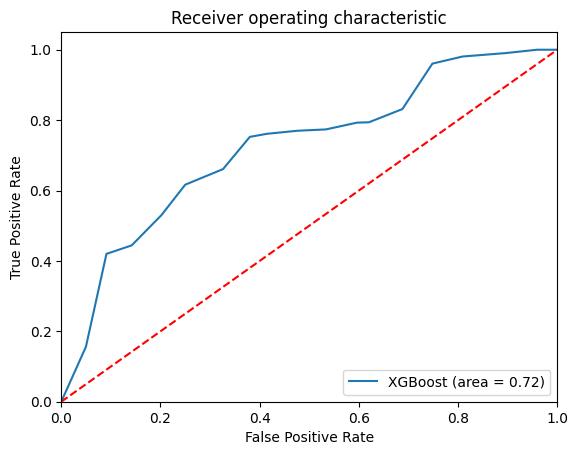

In [24]:
xgboost(X_train_75, y_train, X_val_75, y_val, X_test_75, y_test, "50th quantile")

In [25]:
## Load Datasets
X_train_mean_path = "../data/preprocessed_data/training/X_train_mean.parquet" ## to edit file path
X_train_mean = pd.read_parquet(X_train_mean_path)

/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuanqi/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[20:58:50] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of logistic regression classifier on validation set using mean: 0.93
Accuracy of logistic regression classifier on test set using mean: 0.94


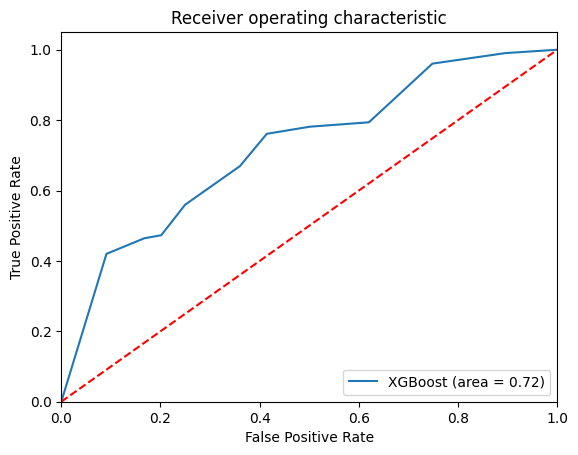

In [26]:
xgboost(X_train_mean, y_train, X_val_mean, y_val, X_test_mean, y_test, "mean")

## Hyperparameters Tuning

In [2]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train_25, y_train.values.ravel())

In [37]:
grid_cv.best_score_

0.8940306247072698

In [38]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 10,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [39]:
param_grid

{'max_depth': [3, 4, 5, 7],
 'learning_rate': [0.1, 0.01, 0.05],
 'gamma': [0, 0.25, 1],
 'reg_lambda': [0, 1, 10],
 'scale_pos_weight': [1, 3, 5],
 'subsample': [0.8],
 'colsample_bytree': [0.5]}

In [5]:
# Insert the new fixed values to the grid
#param_grid["scale_pos_weight"] = [3]
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]
param_grid["gamma"] = [0]

# Give new value ranges to other params
#param_grid["gamma"] = [3, 5, 7]
param_grid["scale_pos_weight"] = [5, 7, 9]
param_grid["max_depth"] = [9, 15, 20]
param_grid["reg_lambda"] = [10, 30, 50]
param_grid["learning_rate"] = [0.3, 0.5, 0.7, 1]

In [ ]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

grid_cv_2 = GridSearchCV(xgb_cl, param_grid, 
                         cv=3, scoring="roc_auc", n_jobs=-1)

_ = grid_cv_2.fit(X_train_25, y_train.values.ravel())

In [12]:
grid_cv_2.best_score_

0.8892375222791186

In [14]:
grid_cv_2.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.3,
 'max_depth': 9,
 'reg_lambda': 50,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [ ]:
# randomized search
# bayesian search